In [1]:
# Importing required libraries
!pip install wordcloud
import os
import time
import datetime
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger


from wordcloud import WordCloud

from pymongo import MongoClient
from pymongo import TEXT

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')

import re

[nltk_data] Downloading package punkt to C:\Users\Alfredo
[nltk_data]     Salazar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Alfredo
[nltk_data]     Salazar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Creating a connection to MongoDB
client = MongoClient('localhost', 27017)
db = client['news']
collection = db['elespectador-bogota']
collection = db['elespectador-economia']
collection = db['elespectador-investigacion']
collection = db['elespectador-judicial']
collection = db['elespectador-politica']

In [3]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

In [4]:
text = " ".join(text)

In [5]:
text

'Voto cristiano, ¿un pecado mortal? Las iglesias cristianas no tienen hoy un líder que los represente de verdad, pero su voto, en gran mayoría, va a ser en contra de Petro. Ese voto nadie lo tiene que guiar ni persuadir, llegará solo. Colombia está cerca de definir cuál será la persona que regirá sus destinos en los próximos cuatro años. Hay incertidumbre si la designación se conocerá en la primera vuelta (programada para el 29 de mayo) o si será necesaria una segunda vuelta (el domingo 19 de junio). Según la reciente encuesta del Centro Nacional de Consultoría para la revista Semana (publicada el pasado 20 de marzo de 2022), en la intención de voto puntea el exalcalde de Bogotá Gustavo Petro, con un 32 % de favorabilidad, seguido por Federico Gutiérrez, con 23 %. Después, empatados, aparecen Rodolfo Hernández y Sergio Fajardo, los dos con un 10 %. En medio de un panorama político en creciente polarización, aguarda muy a la sombra el público elector de las multitudinarias iglesias cris

In [6]:
#At this point, it is necessary to be careful with warnings by losing some important words like names and others. 
text = text.lower()

In [7]:
#Tokenization per sentences.

sentences = sent_tokenize(text)

print(sentences)

['voto cristiano, ¿un pecado mortal?', 'las iglesias cristianas no tienen hoy un líder que los represente de verdad, pero su voto, en gran mayoría, va a ser en contra de petro.', 'ese voto nadie lo tiene que guiar ni persuadir, llegará solo.', 'colombia está cerca de definir cuál será la persona que regirá sus destinos en los próximos cuatro años.', 'hay incertidumbre si la designación se conocerá en la primera vuelta (programada para el 29 de mayo) o si será necesaria una segunda vuelta (el domingo 19 de junio).', 'según la reciente encuesta del centro nacional de consultoría para la revista semana (publicada el pasado 20 de marzo de 2022), en la intención de voto puntea el exalcalde de bogotá gustavo petro, con un 32 % de favorabilidad, seguido por federico gutiérrez, con 23 %.', 'después, empatados, aparecen rodolfo hernández y sergio fajardo, los dos con un 10 %.', 'en medio de un panorama político en creciente polarización, aguarda muy a la sombra el público elector de las multitu

In [8]:
#Tokenization per words with removing punctuation and empty spaces.

tokenizer = nltk.RegexpTokenizer(r"\w+")

words = tokenizer.tokenize(text)

print(words)

['voto', 'cristiano', 'un', 'pecado', 'mortal', 'las', 'iglesias', 'cristianas', 'no', 'tienen', 'hoy', 'un', 'líder', 'que', 'los', 'represente', 'de', 'verdad', 'pero', 'su', 'voto', 'en', 'gran', 'mayoría', 'va', 'a', 'ser', 'en', 'contra', 'de', 'petro', 'ese', 'voto', 'nadie', 'lo', 'tiene', 'que', 'guiar', 'ni', 'persuadir', 'llegará', 'solo', 'colombia', 'está', 'cerca', 'de', 'definir', 'cuál', 'será', 'la', 'persona', 'que', 'regirá', 'sus', 'destinos', 'en', 'los', 'próximos', 'cuatro', 'años', 'hay', 'incertidumbre', 'si', 'la', 'designación', 'se', 'conocerá', 'en', 'la', 'primera', 'vuelta', 'programada', 'para', 'el', '29', 'de', 'mayo', 'o', 'si', 'será', 'necesaria', 'una', 'segunda', 'vuelta', 'el', 'domingo', '19', 'de', 'junio', 'según', 'la', 'reciente', 'encuesta', 'del', 'centro', 'nacional', 'de', 'consultoría', 'para', 'la', 'revista', 'semana', 'publicada', 'el', 'pasado', '20', 'de', 'marzo', 'de', '2022', 'en', 'la', 'intención', 'de', 'voto', 'puntea', 'el',

In [9]:
#Stopwords list for spanish language.

stop_words = set(stopwords.words("spanish"))
print(stop_words)

{'fuera', 'la', 'tú', 'seréis', 'estada', 'estamos', 'hubieseis', 'vuestro', 'serán', 'seas', 'tuviésemos', 'seríamos', 'vuestra', 'hubiesen', 'hasta', 'eres', 'vosotros', 'hubiéramos', 'estará', 'había', 'sean', 'le', 'porque', 'desde', 'suyas', 'otras', 'suyo', 'nuestro', 'estéis', 'o', 'sintiendo', 'serás', 'tuvo', 'habrán', 'al', 'fuiste', 'fuéramos', 'tengan', 'éramos', 'qué', 'algunos', 'tuviese', 'tengo', 'quien', 'tus', 'nosotras', 'hayamos', 'tuvieseis', 'nada', 'fuesen', 'tendrían', 'tendrá', 'mis', 'han', 'hubieron', 'tenidos', 'estuviste', 'estuvieron', 'contra', 'tendríais', 'sentid', 'te', 'tuyo', 'no', 'sería', 'habíamos', 'habrá', 'me', 'hubiste', 'sentidos', 'estuviera', 'estaré', 'estás', 'hemos', 'estuvieran', 'estés', 'habríais', 'tuvieras', 'tenido', 'sobre', 'algunas', 'serías', 'tienes', 'habiendo', 'uno', 'tuyos', 'nos', 'un', 'estaría', 'hubisteis', 'estarían', 'ellos', 'tu', 'unos', 'tenga', 'tendrás', 'hubiera', 'otros', 'tuviste', 'somos', 'tuvieron', 'seré'

In [10]:
#Removing Stopwords.

filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

print("All words:", words)
print("\n")
print("Substracting stopwords:", filtered_words)

All words: ['voto', 'cristiano', 'un', 'pecado', 'mortal', 'las', 'iglesias', 'cristianas', 'no', 'tienen', 'hoy', 'un', 'líder', 'que', 'los', 'represente', 'de', 'verdad', 'pero', 'su', 'voto', 'en', 'gran', 'mayoría', 'va', 'a', 'ser', 'en', 'contra', 'de', 'petro', 'ese', 'voto', 'nadie', 'lo', 'tiene', 'que', 'guiar', 'ni', 'persuadir', 'llegará', 'solo', 'colombia', 'está', 'cerca', 'de', 'definir', 'cuál', 'será', 'la', 'persona', 'que', 'regirá', 'sus', 'destinos', 'en', 'los', 'próximos', 'cuatro', 'años', 'hay', 'incertidumbre', 'si', 'la', 'designación', 'se', 'conocerá', 'en', 'la', 'primera', 'vuelta', 'programada', 'para', 'el', '29', 'de', 'mayo', 'o', 'si', 'será', 'necesaria', 'una', 'segunda', 'vuelta', 'el', 'domingo', '19', 'de', 'junio', 'según', 'la', 'reciente', 'encuesta', 'del', 'centro', 'nacional', 'de', 'consultoría', 'para', 'la', 'revista', 'semana', 'publicada', 'el', 'pasado', '20', 'de', 'marzo', 'de', '2022', 'en', 'la', 'intención', 'de', 'voto', 'pun

In [11]:
filtered_words = []
for i in words : 
    filtered_words += nltk.word_tokenize(i)
print(filtered_words)

['voto', 'cristiano', 'un', 'pecado', 'mortal', 'las', 'iglesias', 'cristianas', 'no', 'tienen', 'hoy', 'un', 'líder', 'que', 'los', 'represente', 'de', 'verdad', 'pero', 'su', 'voto', 'en', 'gran', 'mayoría', 'va', 'a', 'ser', 'en', 'contra', 'de', 'petro', 'ese', 'voto', 'nadie', 'lo', 'tiene', 'que', 'guiar', 'ni', 'persuadir', 'llegará', 'solo', 'colombia', 'está', 'cerca', 'de', 'definir', 'cuál', 'será', 'la', 'persona', 'que', 'regirá', 'sus', 'destinos', 'en', 'los', 'próximos', 'cuatro', 'años', 'hay', 'incertidumbre', 'si', 'la', 'designación', 'se', 'conocerá', 'en', 'la', 'primera', 'vuelta', 'programada', 'para', 'el', '29', 'de', 'mayo', 'o', 'si', 'será', 'necesaria', 'una', 'segunda', 'vuelta', 'el', 'domingo', '19', 'de', 'junio', 'según', 'la', 'reciente', 'encuesta', 'del', 'centro', 'nacional', 'de', 'consultoría', 'para', 'la', 'revista', 'semana', 'publicada', 'el', 'pasado', '20', 'de', 'marzo', 'de', '2022', 'en', 'la', 'intención', 'de', 'voto', 'puntea', 'el',

In [12]:
tokens = nltk.pos_tag(filtered_words)
print(tokens)

[('voto', 'NN'), ('cristiano', 'NN'), ('un', 'JJ'), ('pecado', 'NN'), ('mortal', 'JJ'), ('las', 'NN'), ('iglesias', 'NNS'), ('cristianas', 'VBP'), ('no', 'DT'), ('tienen', 'NN'), ('hoy', 'NN'), ('un', 'JJ'), ('líder', 'NN'), ('que', 'NN'), ('los', 'JJ'), ('represente', 'NN'), ('de', 'IN'), ('verdad', 'FW'), ('pero', 'NN'), ('su', 'NN'), ('voto', 'NN'), ('en', 'IN'), ('gran', 'NN'), ('mayoría', 'NN'), ('va', 'IN'), ('a', 'DT'), ('ser', 'NN'), ('en', 'FW'), ('contra', 'FW'), ('de', 'FW'), ('petro', 'FW'), ('ese', 'JJ'), ('voto', 'NN'), ('nadie', 'JJ'), ('lo', 'JJ'), ('tiene', 'NN'), ('que', 'NN'), ('guiar', 'NN'), ('ni', 'JJ'), ('persuadir', 'NN'), ('llegará', 'NN'), ('solo', 'NN'), ('colombia', 'NN'), ('está', 'JJ'), ('cerca', 'NN'), ('de', 'IN'), ('definir', 'FW'), ('cuál', 'NN'), ('será', 'NN'), ('la', 'NN'), ('persona', 'NN'), ('que', 'NN'), ('regirá', 'NN'), ('sus', 'NN'), ('destinos', 'NN'), ('en', 'IN'), ('los', 'JJ'), ('próximos', 'JJ'), ('cuatro', 'NN'), ('años', 'NN'), ('hay', 

In [13]:
frec_tokens = FreqDist(tokens)

print(tokens)

[('voto', 'NN'), ('cristiano', 'NN'), ('un', 'JJ'), ('pecado', 'NN'), ('mortal', 'JJ'), ('las', 'NN'), ('iglesias', 'NNS'), ('cristianas', 'VBP'), ('no', 'DT'), ('tienen', 'NN'), ('hoy', 'NN'), ('un', 'JJ'), ('líder', 'NN'), ('que', 'NN'), ('los', 'JJ'), ('represente', 'NN'), ('de', 'IN'), ('verdad', 'FW'), ('pero', 'NN'), ('su', 'NN'), ('voto', 'NN'), ('en', 'IN'), ('gran', 'NN'), ('mayoría', 'NN'), ('va', 'IN'), ('a', 'DT'), ('ser', 'NN'), ('en', 'FW'), ('contra', 'FW'), ('de', 'FW'), ('petro', 'FW'), ('ese', 'JJ'), ('voto', 'NN'), ('nadie', 'JJ'), ('lo', 'JJ'), ('tiene', 'NN'), ('que', 'NN'), ('guiar', 'NN'), ('ni', 'JJ'), ('persuadir', 'NN'), ('llegará', 'NN'), ('solo', 'NN'), ('colombia', 'NN'), ('está', 'JJ'), ('cerca', 'NN'), ('de', 'IN'), ('definir', 'FW'), ('cuál', 'NN'), ('será', 'NN'), ('la', 'NN'), ('persona', 'NN'), ('que', 'NN'), ('regirá', 'NN'), ('sus', 'NN'), ('destinos', 'NN'), ('en', 'IN'), ('los', 'JJ'), ('próximos', 'JJ'), ('cuatro', 'NN'), ('años', 'NN'), ('hay', 

In [14]:
frec_tokens.most_common(20)

[(('de', 'IN'), 136),
 (('de', 'FW'), 125),
 (('que', 'NN'), 100),
 (('la', 'FW'), 93),
 (('a', 'DT'), 81),
 (('el', 'NN'), 75),
 (('la', 'NN'), 60),
 (('y', 'NN'), 55),
 (('en', 'FW'), 48),
 (('en', 'IN'), 45),
 (('un', 'JJ'), 36),
 (('no', 'DT'), 35),
 (('por', 'NN'), 35),
 (('para', 'NN'), 34),
 (('el', 'FW'), 32),
 (('los', 'FW'), 32),
 (('las', 'FW'), 31),
 (('una', 'JJ'), 26),
 (('del', 'FW'), 26),
 (('con', 'NN'), 25)]

In [15]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

<FreqDist with 1303 samples and 3896 outcomes>


In [16]:
frec_dist.most_common(20)

[('de', 262),
 ('la', 164),
 ('que', 132),
 ('el', 130),
 ('en', 101),
 ('y', 91),
 ('a', 81),
 ('los', 72),
 ('las', 60),
 ('del', 49),
 ('por', 49),
 ('se', 48),
 ('para', 47),
 ('un', 39),
 ('no', 35),
 ('su', 33),
 ('al', 32),
 ('una', 29),
 ('con', 29),
 ('como', 25)]

<BarContainer object of 10 artists>

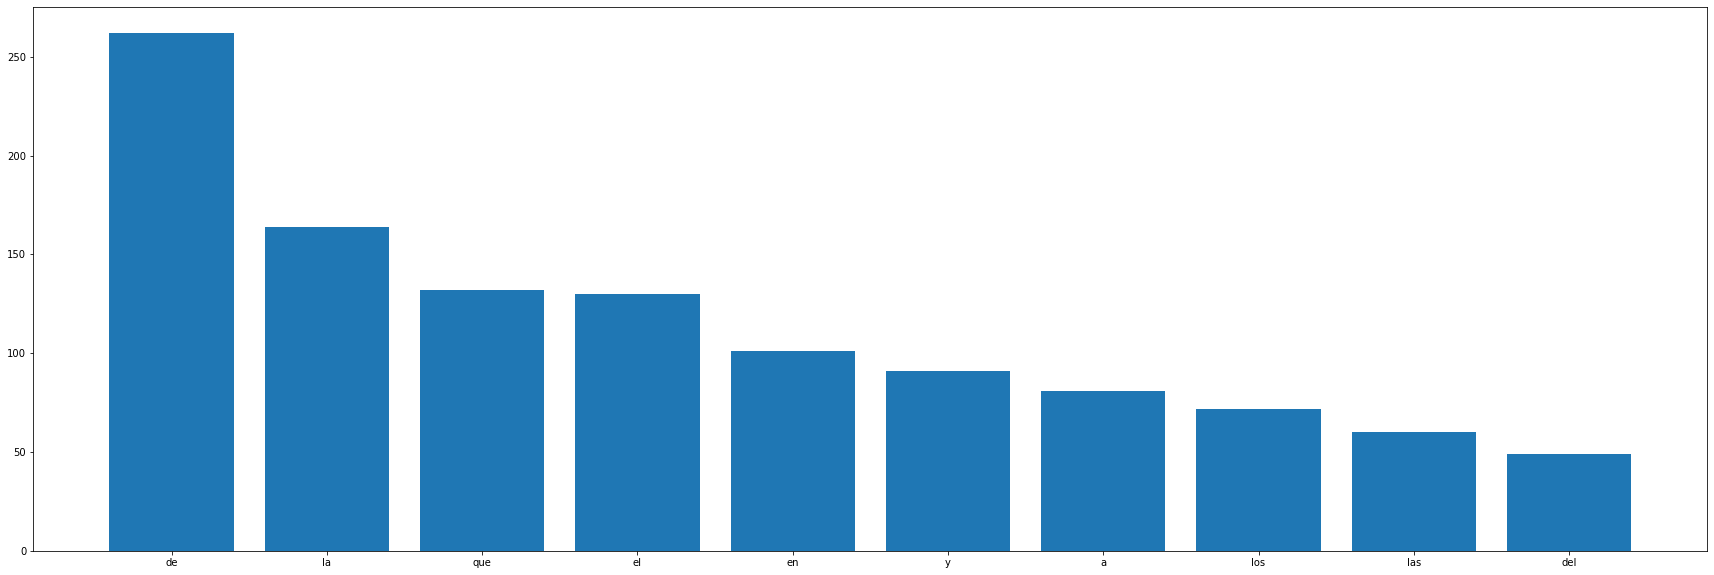

In [17]:
n = 10
plt.figure(figsize=(30,10))
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

In [18]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_4800/1489582600.py, line 5)